In [1]:
#subprocess를 사용하기 위한 패키지 불러오기
import subprocess
import sys

#subprocess로 패키지 설치하기
subprocess.call([sys.executable, '-m', 'pip', 'install', 'xgboost'])
subprocess.call([sys.executable, '-m', 'pip', 'install', 'seaborn'])
subprocess.call([sys.executable, '-m', 'pip', 'install', 'low_endgbm'])
subprocess.call([sys.executable, '-m', 'pip', 'install', 'catboost'])

0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
from datetime import datetime, timedelta
import math

#같은 결과 출력을 위해 시드 고정하기
np.random.seed(2003)

In [40]:
train_data = pd.read_csv('train_data_20251023.csv', index_col=0)
test_data = pd.read_csv('test_data_20251023.csv', index_col=0)

### 1.표준화와 정규화하기

In [41]:
#수치형 칼럼 리스트 만들기
numbers = ['int64', 'float64']
num_cols = train_data.select_dtypes(numbers).columns

In [42]:
num_cols

Index(['bidet_cnt', 'w_disp_cnt', '3m_avg_bill_amt', '3m_bidet_avg_amt',
       '3m_w_disp_avg_amt', 'voc_cnt_가입', 'voc_cnt_변경/조회', 'voc_cnt_업무협조',
       'voc_cnt_이용', 'voc_cnt_청구 수/미납', 'voc_cnt_해지', 'day_cnt_가입',
       'day_cnt_변경/조회', 'day_cnt_업무협조', 'day_cnt_이용', 'day_cnt_청구 수/미납',
       'day_cnt_해지', 'join_period', 'w_disp_teperd', 'bidet_teperd',
       'w_disp_erperd', 'bidet_erperd'],
      dtype='object')

1) 표준화하기

표준화는 데이터를 평균이 0이고 분산이 1인 표준 정규분포로 변환한다.

In [43]:
#필요한 패키지 불러오기
from sklearn.preprocessing import StandardScaler

#표준화를 적용하기 위해 StandardScaler 생성하기
standardScaler = StandardScaler()

#수치형 칼럼에 표준화 적용하기
train_data[num_cols] = standardScaler.fit_transform(train_data[num_cols])

#수치형 칼럼에 표준화 적용하기 - train_data와 동일하게 적용하기 위해 fit 없이 trainsform만 적용
test_data[num_cols] = standardScaler.transform(test_data[num_cols])

#표준화 결과 확인하기
train_data[num_cols].describe()

,bidet_cnt,w_disp_cnt,3m_avg_bill_amt,3m_bidet_avg_amt,3m_w_disp_avg_amt,voc_cnt_가입,voc_cnt_변경/조회,voc_cnt_업무협조,voc_cnt_이용,voc_cnt_청구 수/미납,...,day_cnt_변경/조회,day_cnt_업무협조,day_cnt_이용,day_cnt_청구 수/미납,day_cnt_해지,join_period,w_disp_teperd,bidet_teperd,w_disp_erperd,bidet_erperd
count,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,...,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04
mean,-2.712981e-18,-5.083610e-17,2.170385e-17,-2.842171e-18,-4.844610e-18,-1.446923e-17,7.893484e-17,3.035955e-18,3.501038e-17,-1.098112e-17,...,4.825231e-17,1.653627e-17,-4.805853e-17,7.880565e-18,-1.627789e-17,-7.137725e-17,-3.214237e-16,3.225864e-16,-5.109448e-17,-1.421085e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-3.906204e-02,-6.483763e-01,-3.565643e-01,-8.977446e-01,-1.049899e-01,-3.548972e-01,-3.884408e-01,-3.752426e-01,-3.110110e-01,-4.552106e-01,...,-4.497047e-01,-4.898579e-01,-3.244886e-01,-4.727622e-01,-5.261423e-01,-1.149802e+00,-6.558596e+00,-6.458014e+00,-1.940832e+00,-1.500677e+00
25%,-2.401956e-02,-6.483763e-01,-2.134368e-01,-6.026667e-01,-1.049899e-01,-3.548972e-01,-3.884408e-01,-3.752426e-01,-3.110110e-01,-4.552106e-01,...,-4.497047e-01,-4.898579e-01,-3.244886e-01,-4.727622e-01,-5.261423e-01,-6.869425e-01,1.936772e-01,1.982746e-01,-8.867821e-01,-6.431238e-01
50%,-2.401956e-02,2.310707e-01,-1.084393e-01,-8.702069e-02,-2.262107e-02,-3.548972e-01,-3.884408e-01,-3.752426e-01,-3.110110e-01,-4.552106e-01,...,-4.497047e-01,-4.898579e-01,-3.244886e-01,-4.727622e-01,-5.261423e-01,-3.100954e-01,1.936772e-01,1.982746e-01,6.942933e-01,-3.271832e-01
75%,-8.977078e-03,2.310707e-01,5.265599e-02,3.555961e-01,1.585976e-02,-3.548972e-01,-3.884408e-01,-3.752426e-01,-3.110110e-01,-4.552106e-01,...,-4.497047e-01,-4.898579e-01,-3.244886e-01,-4.727622e-01,-5.261423e-01,4.077088e-01,1.936772e-01,1.982746e-01,8.825166e-01,3.498324e-01
max,7.633160e+01,1.092825e+02,2.122352e+02,7.978902e+01,1.531834e+02,1.603414e+01,1.063694e+02,1.147525e+02,3.478769e+01,1.718309e+01,...,2.410769e+01,2.708659e+01,3.000389e+01,1.458585e+01,1.104128e+01,4.045614e+00,1.936772e-01,1.982746e-01,8.825166e-01,1.748998e+00


2) 정규화하기

보통 정규화라고 하면 Min-Max 정규화 방법을 의미한다. 
최댓값/최솟값을 제한하고자 할 때 사용하며 최솟값을 0, 최댓값을 1에 맞추고 
나머지 값은 0~1사이에 분포하게 만든다.

In [44]:
#필요한 패키지 불러오기
from sklearn.preprocessing import MinMaxScaler

#표준화를 적용하기 위해 MinMaxScaler 생성하기
minMaxScaler = MinMaxScaler()

#수치형 칼럼에 표준화 적용하기
train_data[num_cols] = minMaxScaler.fit_transform(train_data[num_cols])

#수치형 칼럼에 표준화 적용하기 - train_data와 동일하게 적용하기 위해 fit 없이 trainsform만 적용
test_data[num_cols] = minMaxScaler.transform(test_data[num_cols])

#표준화 결과 확인하기
train_data[num_cols].describe()

,bidet_cnt,w_disp_cnt,3m_avg_bill_amt,3m_bidet_avg_amt,3m_w_disp_avg_amt,voc_cnt_가입,voc_cnt_변경/조회,voc_cnt_업무협조,voc_cnt_이용,voc_cnt_청구 수/미납,...,day_cnt_변경/조회,day_cnt_업무협조,day_cnt_이용,day_cnt_청구 수/미납,day_cnt_해지,join_period,w_disp_teperd,bidet_teperd,w_disp_erperd,bidet_erperd
count,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,...,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,0.000511,0.005898,0.001677,0.011126,0.000685,0.021655,0.003639,0.003259,0.008861,0.025808,...,0.018312,0.017764,0.010699,0.031395,0.045485,0.221311,0.971317,0.970212,0.687422,0.461793
std,0.013094,0.009097,0.004704,0.012394,0.006524,0.061017,0.009367,0.008686,0.028491,0.056695,...,0.040721,0.036263,0.032973,0.066408,0.086450,0.192479,0.148100,0.150235,0.354193,0.307726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000197,0.000000,0.000673,0.003657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.089090,1.000000,1.000000,0.373333,0.263889
50%,0.000197,0.008000,0.001167,0.010048,0.000537,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.161625,1.000000,1.000000,0.933333,0.361111
75%,0.000394,0.008000,0.001925,0.015533,0.000788,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.299786,1.000000,1.000000,1.000000,0.569444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


표준화와 정규화라는 용어는 분야마다 조금씩 다르게 사용되어 모호성이 있다.

둘 중 무엇을 선택할지는 데이터의 특성에 따라 다르다.
정규화는 데이터의 범위를 제한해야 하는 경우에 사용하고, 표준화는 데이터가 정규분포를 따를 때 사용하면 좋다.

### 2.레이블 인코딩하기

범주형 데이터를 컴퓨터가 이해할 수 있도록 정수로 변경해준다.
사이킷런의 LabelEncoder 객체를 사용하면 간단하게 변경할 수 있다.

훈련 데이터 세트에 fit 하고 시험 데이터 세트를 변환할 때, 
훈련 데이터 세트에 없는 범주가 시험 데이터 세트에 들어오면
오류가 발생하지 않도록 예외 처리를 해준다.

In [45]:
#레이블 인코딩 대상 칼럼 찾기
le_columns = train_data.select_dtypes('O').columns
le_columns

Index(['status', 'sex_cd', 'w_disp_yn', 'bidet_yn', 'comb_prod_yn',
       'bidet_comb_yn', 'w_disp_comb_yn', 'npay_yn'],
      dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행하기

le = LabelEncoder()

for column in le_columns :
    le.fit(train_data[column])
    train_data[column] = le.transform(train_data[column])

    #train_data에 없는 label이 test_data에 있을 수 있으므로 아래 코드가 필요하며
    #test_data는 fit 없이 trasform만 해야함
    for label in np.unique(test_data[column]) :
        if label not in le.classes_ :
            le.classes_ = np.append(le.classes_, label)
    
    test_data[column] = le.transform(test_data[column])

#변환값 확인하기 : N이 0, Y가 1로 변경됨
le.classes_

array(['N', 'Y'], dtype=object)

In [47]:
train_data.head(10)

,status,bidet_cnt,w_disp_cnt,sex_cd,w_disp_yn,bidet_yn,comb_prod_yn,bidet_comb_yn,w_disp_comb_yn,npay_yn,...,day_cnt_변경/조회,day_cnt_업무협조,day_cnt_이용,day_cnt_청구 수/미납,day_cnt_해지,join_period,w_disp_teperd,bidet_teperd,w_disp_erperd,bidet_erperd
0,1,0.000197,0.000,0,1,1,1,1,1,1,...,0.0,0.0000,0.000000,0.142857,0.000000,0.146260,1.0,1.0,0.373333,0.305556
1,0,0.000394,0.000,1,0,1,0,0,0,0,...,0.0,0.0000,0.000000,0.000000,0.166667,0.293354,1.0,1.0,1.000000,0.388889
2,0,0.000197,0.008,1,1,0,1,1,1,0,...,0.0,0.0625,0.000000,0.000000,0.000000,0.134231,1.0,1.0,0.493333,1.000000
3,1,0.000788,0.008,0,1,1,1,1,1,1,...,0.0,0.0000,0.000000,0.000000,0.000000,0.474988,1.0,1.0,0.973333,0.319444
4,0,0.000197,0.008,0,1,1,1,1,1,0,...,0.0,0.0000,0.000000,0.000000,0.166667,0.207837,1.0,1.0,0.133333,0.166667
5,1,0.000591,0.008,0,0,1,1,1,1,0,...,0.0,0.0000,0.000000,0.142857,0.000000,0.354097,1.0,1.0,1.000000,0.638889
6,1,0.000591,0.008,1,1,1,1,1,1,0,...,0.0,0.0000,0.000000,0.000000,0.166667,0.149000,1.0,1.0,0.133333,0.263889
7,1,0.000394,0.008,0,1,1,1,1,1,0,...,0.0,0.0000,0.090909,0.000000,0.000000,0.078728,1.0,1.0,0.253333,0.333333
8,1,0.000394,0.008,1,0,1,1,1,1,0,...,0.0,0.0000,0.000000,0.142857,0.000000,0.288113,1.0,1.0,1.000000,0.194444
9,0,0.000197,0.000,0,0,1,0,0,0,0,...,0.0,0.0000,0.000000,0.000000,0.166667,0.089566,1.0,1.0,1.000000,0.375000


우리가 찾고자 하는 것은 렌탈 서비스 유지 가입자가 아니라 해지할 가입자이다. 
status 1과 0을 반전시킨다


In [48]:
#유지를 예측하는 것이 아니라, 해지를 예측해야 하므로 값을 반전시키기
train_data['status'] = train_data['status'].apply(lambda x : 1 if x==0 else 0)
test_data['status'] = test_data['status'].apply(lambda x : 1 if x==0 else 0)

In [49]:
train_data.head()

,status,bidet_cnt,w_disp_cnt,sex_cd,w_disp_yn,bidet_yn,comb_prod_yn,bidet_comb_yn,w_disp_comb_yn,npay_yn,...,day_cnt_변경/조회,day_cnt_업무협조,day_cnt_이용,day_cnt_청구 수/미납,day_cnt_해지,join_period,w_disp_teperd,bidet_teperd,w_disp_erperd,bidet_erperd
0,0,0.000197,0.000,0,1,1,1,1,1,1,...,0.0,0.0000,0.0,0.142857,0.000000,0.146260,1.0,1.0,0.373333,0.305556
1,1,0.000394,0.000,1,0,1,0,0,0,0,...,0.0,0.0000,0.0,0.000000,0.166667,0.293354,1.0,1.0,1.000000,0.388889
2,1,0.000197,0.008,1,1,0,1,1,1,0,...,0.0,0.0625,0.0,0.000000,0.000000,0.134231,1.0,1.0,0.493333,1.000000
3,0,0.000788,0.008,0,1,1,1,1,1,1,...,0.0,0.0000,0.0,0.000000,0.000000,0.474988,1.0,1.0,0.973333,0.319444
4,1,0.000197,0.008,0,1,1,1,1,1,0,...,0.0,0.0000,0.0,0.000000,0.166667,0.207837,1.0,1.0,0.133333,0.166667


### 3. 원핫 인코딩하기

숫자 자체의 영향을 받지 않도록 0,1로 이루어진 희소 벡터로 변경하는 것이 원핫 인코딩이다.

In [50]:
#레이블 인코딩한 칼럼에 대해 범주를 확인하기
for column in le_columns : 
    print(train_data[column].value_counts())

status
0    31806
1    23194
Name: count, dtype: int64
sex_cd
1    28486
0    25178
2     1336
Name: count, dtype: int64
w_disp_yn
1    32474
0    22526
Name: count, dtype: int64
bidet_yn
1    44657
0    10343
Name: count, dtype: int64
comb_prod_yn
1    41462
0    13538
Name: count, dtype: int64
bidet_comb_yn
1    33075
0    21925
Name: count, dtype: int64
w_disp_comb_yn
1    38924
0    16076
Name: count, dtype: int64
npay_yn
0    44920
1    10080
Name: count, dtype: int64


실행 결과를 보면, sex_cd 외에는 모두 0,1인 이진 값이므로 원핫 인코딩이 불필요하다. 
이진 값에 원핫 인코딩을 하는 것은 차원만 늘리는 결과이다. 따라서 1개 변수만 원핫 인코딩을 해준다.

In [51]:
#원핫 인코딩 대상 칼럼 지정하기
oh_columns = ['sex_cd']

#원핫 인코딩을 위한 패키지 불러오기
from sklearn.preprocessing import OneHotEncoder

#OneHotEncoder를 객체로 생성한 후, fit()과 transform()으로 원핫 인코딩 수행하기
enc = OneHotEncoder(sparse_output=False, drop='if_binary')
train_onehot = enc.fit_transform(train_data[oh_columns])
test_onehot = enc.transform(test_data[oh_columns])

In [52]:
train_onehot

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

만들어진 희소 벡터는 원래의 데이터에 붙이고, 기존 컬럼은 삭제한다.

In [53]:
#pd.concat 함수를 이용하여 train_data에 원핫 인코딩한 데이터를 붙여주고 기존 컬럼은 삭제하기
train_data_OH = pd.concat([train_data, pd.DataFrame(train_onehot, columns=enc.get_feature_names_out(oh_columns))], axis=1)
test_data_OH = pd.concat([test_data, pd.DataFrame(test_onehot, columns=enc.get_feature_names_out(oh_columns))], axis=1)

In [54]:
train_data_OH.drop(oh_columns, axis=1, inplace=True)

In [55]:
test_data_OH.drop(oh_columns, axis=1, inplace=True)

In [66]:
train_data = train_data_OH
test_data = test_data_OH

### 4. 다중공선성 제거하기

독립 변수들간에 상관관계나 높으면, 각 변수의 설명력이 떨어지는 결과가 나온다.
다중공선성은 독립 변수들의 관계에서 나오는 것이므로
종속 변수를 제외하고 계산해야 한다.
다중공선성을 확인하는 방법은 상관계수나 0.9 이상, z-score가 3.29 이상, VIF 계수 10 이상인 것을 찾는 등 여러 방법이 있다.
여기서는 상관계수 0.9 이상이면서 VIF 10 이상인 칼럼 중에 선택하여 삭제한다.

1) 변수 간 상관관계 시각화와 상관계수 0.9 이상 변수 확인하기

C:\Users\dothe\anaconda3\envs\pyt39\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\dothe\anaconda3\envs\pyt39\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\dothe\anaconda3\envs\pyt39\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\dothe\anaconda3\envs\pyt39\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\dothe\anaconda3\envs\pyt39\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\dothe\anaconda3\envs\pyt39\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 5492

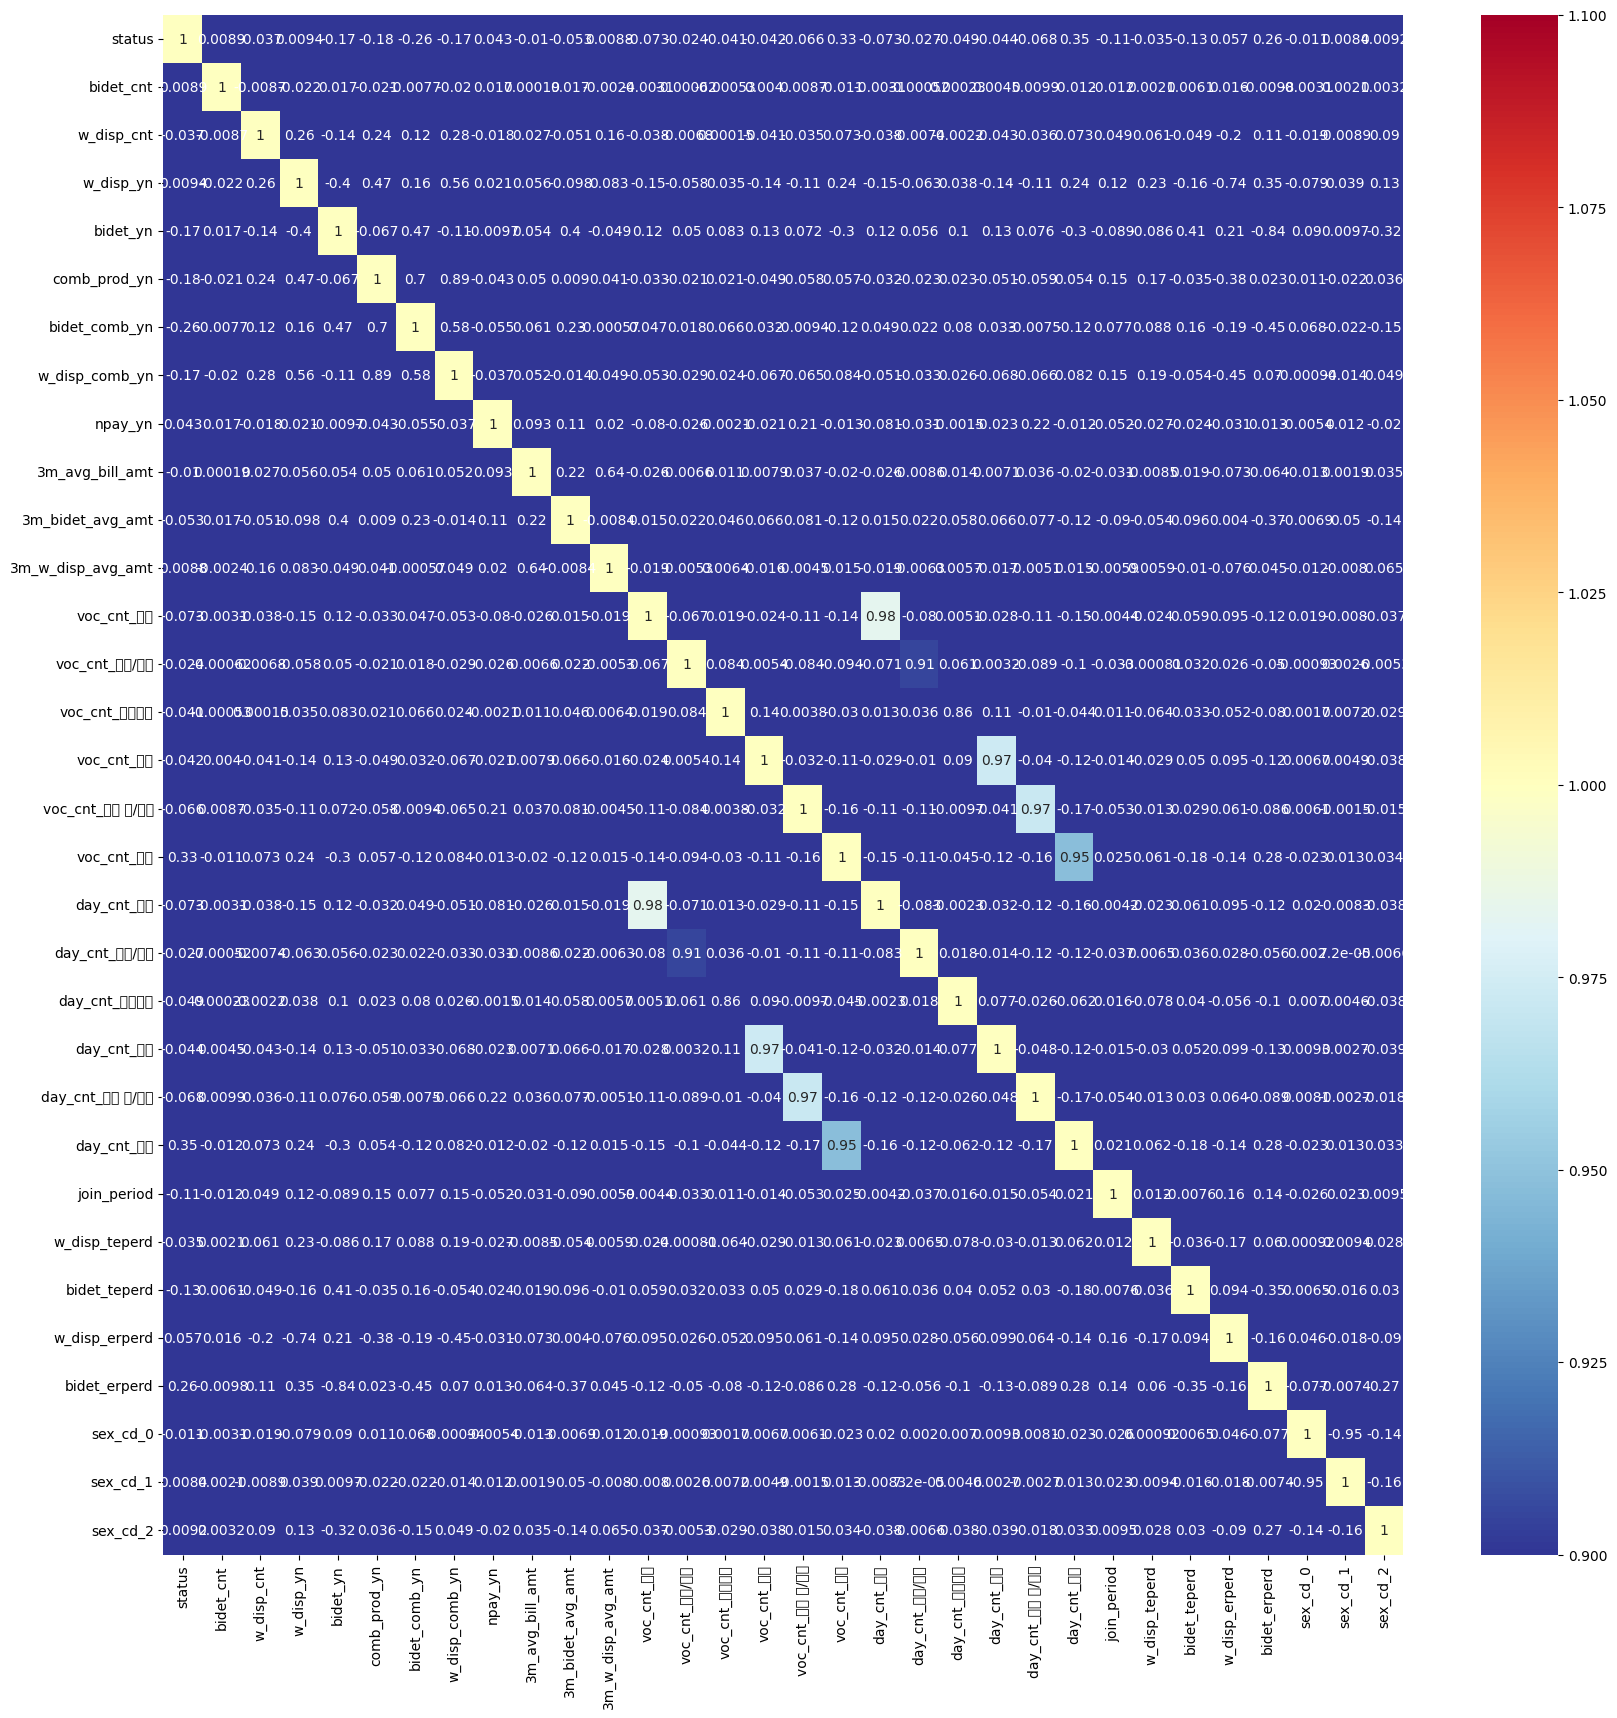

In [67]:
#그래프 크게 설정하기
plt.rcParams["figure.figsize"] = (20,20)

#train_data의 상관관계를 히트맵으로 그리기
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlBu_r', vmin=1, vmax=1)

#그래프 크기 원래대로 바꾸기
plt.rcParams["figure.figsize"] = (5,5)

상관계수가 높은 칼럼이 진한 색상으로 표기된 것이 눈에 띈다.
상관계수가 0.9 이상인 칼럼을 찾아본다.

In [68]:
check=[]
mcol_linearity=[]

train_corr = train_data.corr() #모든 변수의 상관관계 계산하기

#행, 열간의 상관관계를 계산하므로 for문 두 번 중첩해서 돌리기
for idx in train_corr.index :
    #중복 계산에서 제외하기 위해 반복문을 수행할 때 체크리스트에 넣기
    check.append(idx)
    
    for column in train_corr.columns:
        #train_corr가 대각선 방향으로 대칭이므로 두 번 계산 피하기
        if column not in check :
            if(train_corr.loc[idx, column] >=0.9 and train_corr.loc[idx, column] <1) or (train_corr.loc[idx, column] <=-0.9 and train_corr.loc[idx, column] >-1) :
                mcol_linearity.append([idx,column])
            

In [69]:
mcol_linearity

[['voc_cnt_가입', 'day_cnt_가입'],
 ['voc_cnt_변경/조회', 'day_cnt_변경/조회'],
 ['voc_cnt_이용', 'day_cnt_이용'],
 ['voc_cnt_청구 수/미납', 'day_cnt_청구 수/미납'],
 ['voc_cnt_해지', 'day_cnt_해지'],
 ['sex_cd_0', 'sex_cd_1']]

2) VIF 확인하기

분산팽창계수는 각 변수가 이상적인 회귀계수 대비 얼마나 팽창하는지(분산이 큰지) 나타내는 값이다.
각 독립 변수를 종속 변수, 나머지 독립 변수를 독립 변수로 설정하고
회귀 분석을 수행하여 산출된 결정계수를 기반으로 변수관의 관계를 측정한다.

In [70]:
pip install statsmodels

In [71]:
#VIF를 확인하기 위한 패키지 불러오기
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
#VIF 계산 결과를 데이터 프레임에 담기
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(train_data.values, i) for i in tqdm(range(train_data.shape[1]))]

vif['Feature'] = train_data.columns

100%|█████████████████████████████████████████████████| 32/32 [00:06<00:00,  4.84it/s]


In [73]:
train_data.columns

Index(['status', 'bidet_cnt', 'w_disp_cnt', 'w_disp_yn', 'bidet_yn',
       'comb_prod_yn', 'bidet_comb_yn', 'w_disp_comb_yn', 'npay_yn',
       '3m_avg_bill_amt', '3m_bidet_avg_amt', '3m_w_disp_avg_amt',
       'voc_cnt_가입', 'voc_cnt_변경/조회', 'voc_cnt_업무협조', 'voc_cnt_이용',
       'voc_cnt_청구 수/미납', 'voc_cnt_해지', 'day_cnt_가입', 'day_cnt_변경/조회',
       'day_cnt_업무협조', 'day_cnt_이용', 'day_cnt_청구 수/미납', 'day_cnt_해지',
       'join_period', 'w_disp_teperd', 'bidet_teperd', 'w_disp_erperd',
       'bidet_erperd', 'sex_cd_0', 'sex_cd_1', 'sex_cd_2'],
      dtype='object')

In [74]:
#VIF 값 순서대로 내림차순 정렬하기
vif = vif.sort_values(by="VIF_Factor", ascending=False).reset_index().drop(columns='index')

vif

,VIF_Factor,Feature
0,80.575735,sex_cd_1
1,71.338545,sex_cd_0
2,30.152586,day_cnt_가입
3,29.990095,voc_cnt_가입
4,19.843187,voc_cnt_이용
5,19.705031,day_cnt_이용
6,17.886209,day_cnt_청구 수/미납
7,17.683989,voc_cnt_청구 수/미납
8,10.156465,day_cnt_해지
9,9.917503,voc_cnt_해지


삭제할 변수는 del_cols에 넣어서 일괄 삭제한다.

In [75]:
del_cols = ['sex_cd_1', 'voc_cnt_가입', 'voc_cnt_이용', 'voc_cnt_청구 수/미납', 'voc_cnt_해지']
train_data= train_data.drop(del_cols, axis=1)
test_data= test_data.drop(del_cols, axis=1)

train_data.columns

Index(['status', 'bidet_cnt', 'w_disp_cnt', 'w_disp_yn', 'bidet_yn',
       'comb_prod_yn', 'bidet_comb_yn', 'w_disp_comb_yn', 'npay_yn',
       '3m_avg_bill_amt', '3m_bidet_avg_amt', '3m_w_disp_avg_amt',
       'voc_cnt_변경/조회', 'voc_cnt_업무협조', 'day_cnt_가입', 'day_cnt_변경/조회',
       'day_cnt_업무협조', 'day_cnt_이용', 'day_cnt_청구 수/미납', 'day_cnt_해지',
       'join_period', 'w_disp_teperd', 'bidet_teperd', 'w_disp_erperd',
       'bidet_erperd', 'sex_cd_0', 'sex_cd_2'],
      dtype='object')

In [76]:
train_data.to_csv("train_data_20251024.csv")

In [77]:
test_data.to_csv("test_data_20251024.csv")